#Divide y Venceras
#Introduccion
En este algoritmo se utilizara la tecnica de divide y venceras para conseguir el camino que los peones deben de recorrer para lograr llegar al otro extremo del tablero y asi poder ganar. En este caso tendremos en cuenta los siguientes parametros:
- **Tablero**: El tablero sera de (n.2)+3 siendo n el tamano del tablero. Si el tablero es de 9x9 entonces se generara un tablero de (n.2)+3 ya que entre cada azulejo donde el peon se puede mover existira un espacio donde se puede agregar (o no) una pared. Es por esto que el peon avanza de dos en dos espacios. Ademas, aqui incluimos el contorno del tablero que especifica los limites. 
- **Peones**: Los peones saben que el otro existe y si se cruzan saltaran por encima del otro (al que le toque el turno). En este algoritmo se registrara la posicion a la que cada peon se mueve cuando le toca su turno. Cuando un peon llega a la meta el otro pierde y se para hasta donde pudo llegar. 
- **Experimentos**: Se haran 4 pruebas, 3 de ellas seran con tableros vacios pero con diferentes tamanos para probar el tiempo en que se demora en llegar un peon primero al otro extremo. Una de las pruebas sera en un laberinto donde cada peon empezara en una esquina y tendran que llegar al otro extremo. Este tablero sera creado manualmente, es una prueba de velocidad ante la existencia de objetos.



##Bibliotecas
Se utilizaran la siguiente biblitocas para la creacion y experimentacion del proyecto:
* Numpy: es una libreria la cual utilizaremos para crear matrices, en este caso el mapa del simulador.
* seaborn: es la libreria que se encargara de graficar la matriz dandoles los colores a los azulejos.
* Matplotlib: es otra libreria grafica que creara la figura para poder visualizarla. 
* Time: libreria time sera utilizada para extraer el tiempo que el algoritmo demora en resolver sus retos.

In [1]:

import math
import random
import numpy as np
import seaborn as sns
from pylab import *
import time
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Generar Matriz
Esta es un simple metodo que se encarga de generar la matriz de acuerdo a este algoritmo. En este caso sera la matriz normal que se genera asignandole un tamano *n*. Esta matriz es creada utilizando la libreria numpy. Se llena de 0's y luego crea un doble contorno de 1's

In [2]:
def generarMatriz(n):
  matriz=np.ones(shape=(n,n)).astype(int)*0#--O()
  matriz[0:2,0:n]=1
  matriz[0:n,0:2]=1   
  matriz[n-2:n:,0:n]=1
  matriz[0:n,n-2:n]=1

  return matriz

##Laberinto de 9x9 para probar el algoritmo
Esta matriz es para una de las pruebas, las paredes del algoritmo se colocaron manualmente y solo funciona con un valor de **n** el cual siempre sera 9. Sera utilizada para medir el tiempo en q uno de los peones encuentre la salida al otro extremo.

In [3]:
def generarLaberinto(n):
 matriz=np.ones(shape=(n,n)).astype(int)*0#--O()
 matriz[0:2,0:n]=1
 matriz[0:n,0:2]=1   
 matriz[n-2:n:,0:n]=1
 matriz[0:n,n-2:n]=1
 matriz[2:4,3] = 1
 matriz[5:10,2:4]=1
 matriz[11, 2:12]=1
 matriz[15:19,3:5]=1
 matriz[16:18,7:12]=1
 matriz[8:11,13]=1
 matriz[6:8,5:12]=1
 matriz[3:4,13:19]=1
 matriz[14:16,18]=1
 matriz[16:19,17]=1
 matriz[2,2:7]=1
 return matriz



##Girar el Tablero
En este algoritmo los peones siempre buscan subir, llegar al otro extremo de arriba. Es por este motivo que el tablero da un giro de 180 grados cuando es el turno de un peon y asi ambos siguen su objetivo que es subir hasta su meta. 

``Complejidad``: La complejidad es de O(n^2) debido a la existencia de un doble for anillado. Analizando solo uno de ellos vemos que su complejidad seria de O(n).(n.9/2) = O(n^2) 

In [4]:
def giro180(tablero):       #O(5) + (9/2)O(n^2) + 9/2O(n^2) === O(n^2)
  N=len(tablero)  #O(2)
  M=N//2  #O(2)
  aux=0   #O(1)
  for i in range(N):   #(n)             O(n).(n.9/2) = O(n2) n cuadrado
    for j in range(M):   #(n/2)         O(n/2).O(9) = O(n.9/2)
      aux = tablero[i][j]   #(2)
      tablero[i][j] = tablero[i][N-j-1]   #O(4)
      tablero[i][N-j-1]=aux  #(3)
  for i in range(M):  #O(n2)
    for j in range(N):
      aux = tablero[i][j]
      tablero[i][j] = tablero[N-i-1][j]
      tablero[N-i-1][j]=aux

##Dibujar Tablero
Este metodo solo se encarga de graficas las matrices. Utiliza las librerias de ``numpy`` y ``matplotlib``

In [5]:
def dibujarTablero(matriz, id=True):
    plt.figure(figsize=(np.size(matriz,0),np.size(matriz,1)))
    sns.heatmap(matriz, linewidths=.1, linecolor='white',
                annot=False, cmap='magma', yticklabels=False,
                xticklabels=False, cbar=False, square=True);
    sns.heatmap(matriz, linewidths=.1, linecolor='white',
                annot=id, cmap='magma', yticklabels=False,
                xticklabels=False, cbar=False, square=True,
                mask=np.array(matriz)<0);
    plt.ion()

##Clase peon
En la clase peon se utilizan varios metodos para definir el movimiento y las decisiones del peon de a donde quiere moverse y si es que necesita saltar sobre su oponente. En la clase peon, el peon genera otro tablero donde lo modificara con sus calculos al utilizar su algoritmo para saber por donde ir. El algoritmo es el siguiente: 
- Se generara un rectangulo que tomara los limites de las paredes al rededor del peon para saber si esta encerrado o no, teniendo en cuenta la longitud de la pared de enfrente suyo. Una vez genere este rectangulo analizara posibles salidad arriba, abajo, a la izquierda y a la derecha antes de decidir por cual de ellas ir para llegar a su objetivo

Como ya se explico arriba existen varios metodos y entre estos meotodos esta el metodo principal el cual es ``ObtenerRuta``, este metodo se encarga de iniciar todo el sistema de movimiento, lo explicaremos mas adelante. 

**Los metodos**
- ``determinar_rectangulo``: este metodo toma los limites de las paredes alrededor del peon para generar un rectangulo el cual utilizara para analizar a donde debe ir para seguir avanzando.
-``Obtener``: este metodo se utiliza dentro del meodo determinar rectangulo y se encarga de obtener la longitud de la pared que el peon tiene enfrente y no lo deja continuar avanzando hacia adelante.
-``Chequear``: el metodo chequear se encarga de asegurar que la longitud horizontal del rectangulo permanezca dentro del limite de la pared que evita el paso del peon hacia adelante. De esta manera el rectangulo no es tan grande y se concentra en salir de alli en la menor cantidad de pasos posible.
-``Obetener Salida vertial`` y ``Obtener salidad Horizontal``: estos dos metodos solo se utilizan para definir la posiciones a donde el peon puede dirigirse dentro de su rectangulo.
-``marcar``: marca las zonas de "*3*" donde puede pasar/avanzar y de "*2*" las que no tienen salida.
-``Decidir``: finalmente decidir, como su nombre lo indica, decide de todas las listas de posibles posiciones a las que el peon se puede mover cual es la menor.


Luego de esto el peon realiza unas operaciones con respecto a la ruta que se encargara de la posicion del peon oponente para saber si va a avanzar. En caso existan paredes, para saber si puede seguir yendo hacia arriba, abajo, izquierda o derecha y finalmente decide un movimiento de 2 espacios o 4 hacia una posiciones del tablero. El metodo ``ObetenerRuta`` devuelve la ruta hacia donde el peon avanzara.

``Complejidad``: La complejidad de la clase es de O(n^2) teniendo en cuenta que el metodo ``marcar`` utiliza un doble for al igual que el constructor de la clase. 

In [6]:
class Peon:
  def __init__(self,tablero,x,y,d): #O(4)+O(4)+(2) + O(n).(O(1) + O(2) + O(n).O(4)) === O(n2)
    self.PX=x #O(1)
    self.PY=y #O(1)
    self.ID=d #O(1)
    self.tableroP = [] #O(1)
    #Se genera un tablero identico dentro del peon para hacer analisis y modificaciones con respecto a donde quiere moverse
    for i in range(len(tablero)): #=(2) + O(n).(O(1) + O(2) + O(n).O(4)) = O(n2)
      self.tableroP.append([]) #O(1)
      for j in range(len(tablero)): #O(n)
        self.tableroP[i].append(tablero[i][j]) #O(4)
  #Getters y Setters
  def getPX(self): #O(1)
    return PX
  def getPY(self):#O(1)
    return PY
  def getT(self):#O(1)
    return self.tableroP
  def setPX(self,p):#O(1)
    PX=p
  def setPY(self,p):#O(1)
    PY=partition
  
  def chequear(self,t,x,xf,y):#O(6)+O(n).O(4) ===O(n)
    for i in range(xf-x+1):#O(2)---> O(n) esto porque la longitud de xf-x+1 puede ir de extremos a extremo cubriendo las n columnas del tablero
      if t[x+i][y]!=0: #O(3)
        return False #O((1)
    return True#O(1)
  
  def obtener(self,t,i,j):#O(12)+2O(n)=== O(n)
    a=j#O(1)
    b=j#O(1)
    while t[i][a]==1 and a<15:#O(4) --->O(n)
      a+=1
    a-=1#O(1)
    while t[i][b]==1 and b>1:#O(n)
      b-=1#O(1)
    b+=1#O(1)
    return [b,a]#O(1)

  def determinar_rectangulo(self,t,i,j):#O(7)+3O(n)====O(n)
    x=i#O(1)
    y=j#O(1)
    xf=i#O(1)
    yf=j#O(1)
    while t[x][y]==0:#O(2)----->O(n)
      x-=1#O(1)
    x+=1#O(1)
    if x!=2:#O(1)   ------>=O(28)+2O(n)  ------->O(n)
      while t[xf][y]==0:#O(2)    O(n)
        xf+=1#O(1)
      xf-=1#O(1)
      pared=self.obtener(t,x-1,j)#O(5)
      while self.chequear(t,x,xf,y-1) and y-1>pared[0]:#O(n/2)este sumado con el sigue dan n
        y-=1#O(1)
      while self.chequear(t,x,xf,yf+1) and yf+1<pared[1]:#O(9)---->=O(n/2)
        yf+=1#O(1)
    return [x,y,xf,yf]#O(1)
  
  def obtenerSalidadVerticales(self,t,x,xf,y,p,salida):#O(8)+10O(n) = O(n)
   for i in range(xf-x+1):#O(2)    ->O(n)
     if t[x+i][y+p]!=1:#O(4)
       if t[x+i][y]!=1:#O(3)
         salida.append([x+i,y])#O(3)
  def obtenerSalidadHorizontales(self,t,y,yf,x,pared,salida):#O(n)
    for i in range(yf-y+1):
      if t[pared][y+i]!=1:
        if t[x][y+i]==1:
          salida.append([x,y+i])
          
  def decidir(self,tablero,sD,sI,sA,sB):#O(n)
    lista = []
    posicion=[]
    for i in range(len(sD)):#O(n-4)
      lista.append(sD[i])#O(2)
    for i in range(len(sI)):#O(n-4)
      lista.append(sI[i])#O(2)
    for i in range(len(sA)):#O(n-4)
      lista.append(sA[i])#O(2)
    for i in range(len(sB)):#O(n-4)
      lista.append(sB[i])#O(2)
    if lista!=[]:#O(1)
      posicion=lista[0]#O(2)
      for i in lista:#O(4*(n-4))
        if tablero[posicion[0]][posicion[1]]>tablero[i[0]][i[1]]:#O(7)
          posicion=i#O(1)
    return posicion#O(1)
	
  def marcar(self,r,n):#O(6*(n-2)2)====O(n2)
    for i in range(r[2]-r[0]+1):#O(n-2)
      for j in range(r[3]-r[1]+1):#O(n-2)
        self.tableroP[r[0]+i][r[1]+j]=n#O(6)
  def esta(self,punto,r):#O(15)
    return punto[0]<=r[2] and punto[0]<=r[0] and punto[1]<=r[3] and punto[0]<=r[1]
    
  def obtenerruta(self,tablero,posx,posy,adx,ady):#=O(105)
    r=self.determinar_rectangulo(tablero,posx,posy)#O(4)
    cen = False#O(1)
    salidaD=[]#O(1)
    salidaI=[]#O(1)
    salidaA=[]#O(1)
    salidaB=[]#O(1)
    if r[0]-1==1:#O(3)
      salidaA.append([2,posy])#O(4)
    else:
      self.obtenerSalidadVerticales(tablero,r[0],r[2],r[3]+2,-1,salidaD)#O(10)
      self.obtenerSalidadVerticales(tablero,r[0],r[2],r[1]-2,1,salidaI)#O(10)
      self.obtenerSalidadHorizontales(tablero,r[1],r[3],r[0]-2,r[0]-1,salidaA)#O(12)
      self.obtenerSalidadHorizontales(tablero,r[1],r[3],r[2]+2,r[0]+1,salidaB)#O(12)
    if salidaI == [] and salidaA == [] and salidaB==[]:#O(5)
      self.marcar(r,3)#O(2)
      cen = True#O(1)
    if salidaI == [] and salidaA == [] and salidaD==[]:#O(5)
      self.marcar(r,3)#O(2)
      cen = True#O(1)
    if salidaB == [] and salidaA == [] and salidaD==[]:#O(5)
      self.marcar(r,3)#O(2)
      cen = True#O(1)
    if salidaI == [] and salidaB == [] and salidaD==[]:#O(5)
      self.marcar(r,3)#O(2)
      cen = True#O(1)
    if cen==False:#O(1)
      self.marcar(r,2)#O(2)
    meta=self.decidir(tablero,salidaD,salidaI,salidaA,salidaB)#O(6)
    #print("meta ",meta)

    ruta=[]#O(1)
    if meta!=[]:#O(1)
      if meta[0]==posx:#O(2)
        if meta[1]>posy:#O(2)
          if posx == adx and posy+2 == ady:#O(4)
            if posy+4!=1:#O(2)
              ruta=[posx,posy+4]#O(1)
          else:
            ruta=[posx,posy+2]
        else:
          if posx == adx and posy-2 == ady:
            if posy-4!=1:
              ruta=[posx,posy-4]
          else:
            ruta=[posx,posy-2]
      else:
        if meta[1]==posy:
          if meta[0]>posx:
            if posx+2 == adx and posy == ady:
              if posx+4!=1:                
                ruta=[posx+4,posy]
            else:
              ruta=[posx+2,posy]
          else:
            if posx-2 == adx and posy == ady:
              if posx-4!=1:
                ruta=[posx-4,posy]
            else:
              ruta=[posx-2,posy]
        else:
          if self.esta([posx,meta[1]],r):
            if meta[1]>posy:
              if posx == adx and posy+2 == ady:
                if posy+4!=1:
                  ruta=[posx,posy+4]
              else:
                ruta=[posx,posy+2]
            else:
              if posx == adx and posy-2 == ady:
                if posy-4!=1:
                  ruta=[posx,posy-4]
              else:
                ruta=[posx,posy-2]
          else:
            if meta[0]>posx:
              if posx+2 == adx and posy == ady:
                if posx+4!=1:
                  print("SALTEEEE")
                  ruta=[posx+4,posy]
              else:
                ruta=[posx+2,posy]
            else:
              if posx-2 == adx and posy == ady:
                if posx-4!=1:
                  print("SALTEEEE")
                  ruta=[posx-4,posy]
              else:
                ruta=[posx-2,posy]
    self.tableroP[posx][posy]=self.ID
    return ruta

##Inicio
En inicio es donde todo el juego inicia, recibe las posiciones de ambos peones y su respectivo tablero donde se realizara la simulacion. En un bucle se encarga de, por turnos, llamar al metodo ``obtener ruta`` de la clase peon para mover a ambos peones de posiciones. El bucle termina cuando uno de los dos peones llega al otro extremo primero. Cada turno de un peon el tablero gira 180 grados. Finalmente impirme los tableros. 

Se imprimen varias cosas. Primero se imprimen las posiciones a las que cada peon avanzo durante su turno. Luego se imprimen 2 tableros, el primero muestra el inicio de la simulacion con cada peon en un extremo y el segundo muestra el resultado con un peon llegando a la meta y el otro quedandose en alguna posicion ya que fue derrotado. 
Finalmente se muestran dos tableros los cuales muestran la logica de los peones. El primer tablero muestra pinta las zonas por las que el primer peon analizo avanzar o descarto de sus posibilidades y el segundo muestra las opciones del segundo peon. 

In [7]:
def inicio(posx,posy,posx2,posy2,tablero):
  centinela = True #O(1)
  intencion = []#O(1)
  #creamos peon 9
  peon = Peon(tablero,posx,posy,9)#O(5)
  aux=tablero[posx][posy]#O(2)




  giro180(tablero)#O(1)
  
  #creamos peon 10
  peonA = Peon(tablero,posx2,posy2,10)#O(5)
  aux1=tablero[posx2][posy2]#O(3)
  tablero[posx2][posy2] = 10#O(2)

  giro180(tablero)#O(1)
  tablero[posx][posy] = 9#O(2)
  dibujarTablero(tablero)#O(1)

  tablero[posx][posy] = aux#O(2)
  giro180(tablero)#O(1)
  tablero[posx2][posy2] = aux1#O(2)

  giro180(tablero)#O(1)

  while True:
    tablero[posx2][posy2]=10#O(2)
    giro180(tablero)#O(1)
    aux=np.where(tablero==10)#O(3)
    posic = [aux[0][0],aux[1][0]]#O(3)
    giro180(tablero)#O(1)#O(1)
    tablero[posx2][posy2]=0#O(2)
    intencion=peon.obtenerruta(tablero,posx,posy,posic[0],posic[1])#O(8)
    print("movimiento de peon 9. ",intencion)#O(1)
    if intencion==[]:
      break#O(1)
    posx=intencion[0]#O(2)
    posy=intencion[1]#O(2)
    peon.setPX=posx#O(1)
    peon.setPY=posy#O(1)
    if intencion[0]-1==1:
      break

    giro180(tablero)
    tablero[posx][posy]=10
    giro180(tablero)
    aux=np.where(tablero==10)
    posic = [aux[0][0],aux[1][0]]
    giro180(tablero)
    tablero[posx][posy]=0
    intencion=peonA.obtenerruta(tablero,posx2,posy2,posic[0],posic[1])
    print("movimiento de peon 10. ",intencion)
    if intencion ==[]:
      giro180(tablero)
      break
    posx2=intencion[0]
    posy2=intencion[1]
    peonA.setPX=posx2
    peonA.setPY=posy2
    if intencion[0]-1==1:
      giro180(tablero)
      break
    giro180(tablero)
  aux=tablero[posx][posy]
  tablero[posx][posy] = 9


  giro180(tablero)
  aux1=tablero[posx2][posy2]
  tablero[posx2][posy2] = 10

  giro180(tablero)
  dibujarTablero(tablero)
  tablero[posx][posy] = aux
  giro180(tablero)
  tablero[posx2][posy2] = aux1

  dibujarTablero(peon.getT())
  dibujarTablero(peonA.getT())


##Medicion de tiempo
Este algoritmo es utilizado para calcular el tiempo que demora el algoritmo en cumplir sus Pruebas

In [8]:
def mesure_time(inicio,px,py,px2,py2,tablero):
  start=time.time()
  inicio(px,py,px2,py2,tablero)
  end=time.time()
  return end-start



#Datos para iniciar el experimento


Lista vacia que se encargara de almacenar los tiempos

In [9]:
listaTiempos=[]

##Prueba 1: matriz 9x9 vacia

movimiento de peon 9.  [16, 10]
movimiento de peon 10.  [16, 10]
movimiento de peon 9.  [14, 10]
movimiento de peon 10.  [14, 10]
movimiento de peon 9.  [12, 10]
movimiento de peon 10.  [12, 10]
movimiento de peon 9.  [10, 10]
movimiento de peon 10.  [8, 10]
movimiento de peon 9.  [8, 10]
movimiento de peon 10.  [6, 10]
movimiento de peon 9.  [6, 10]
movimiento de peon 10.  [4, 10]
movimiento de peon 9.  [4, 10]
movimiento de peon 10.  [2, 10]


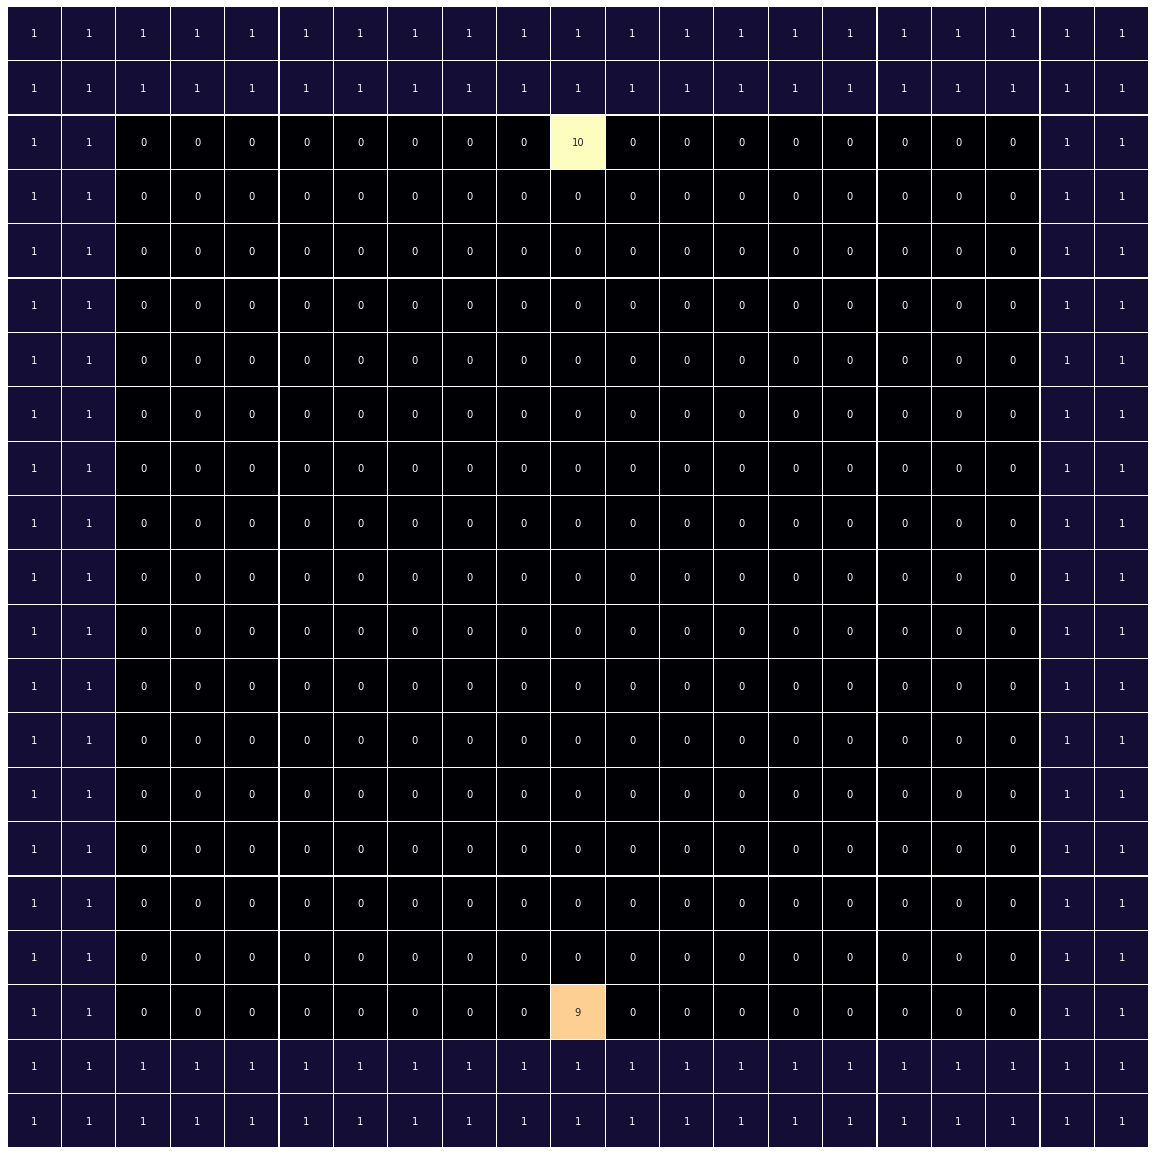

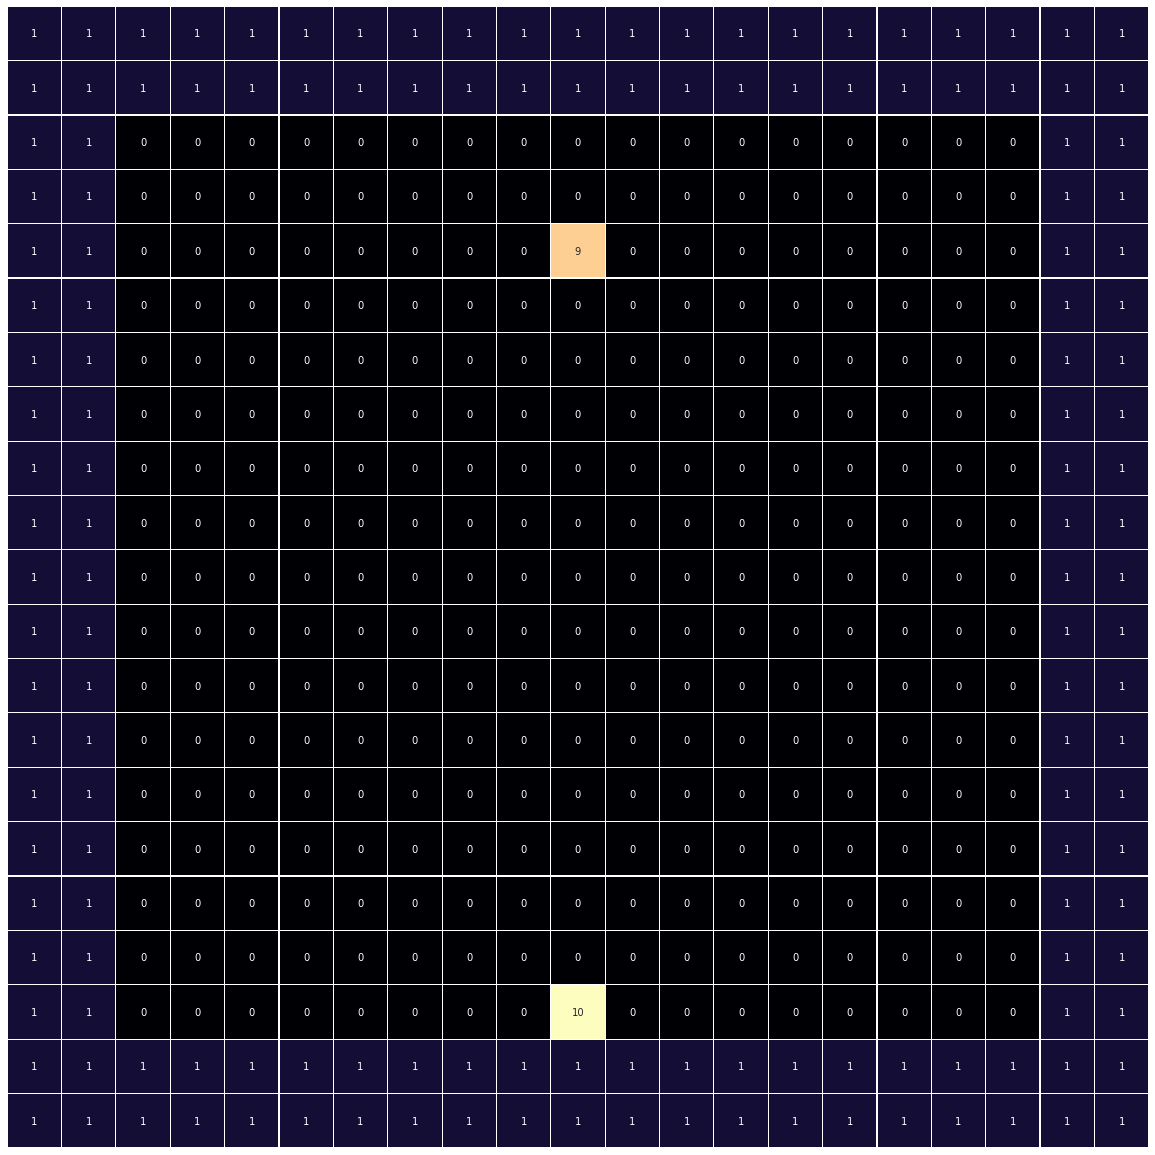

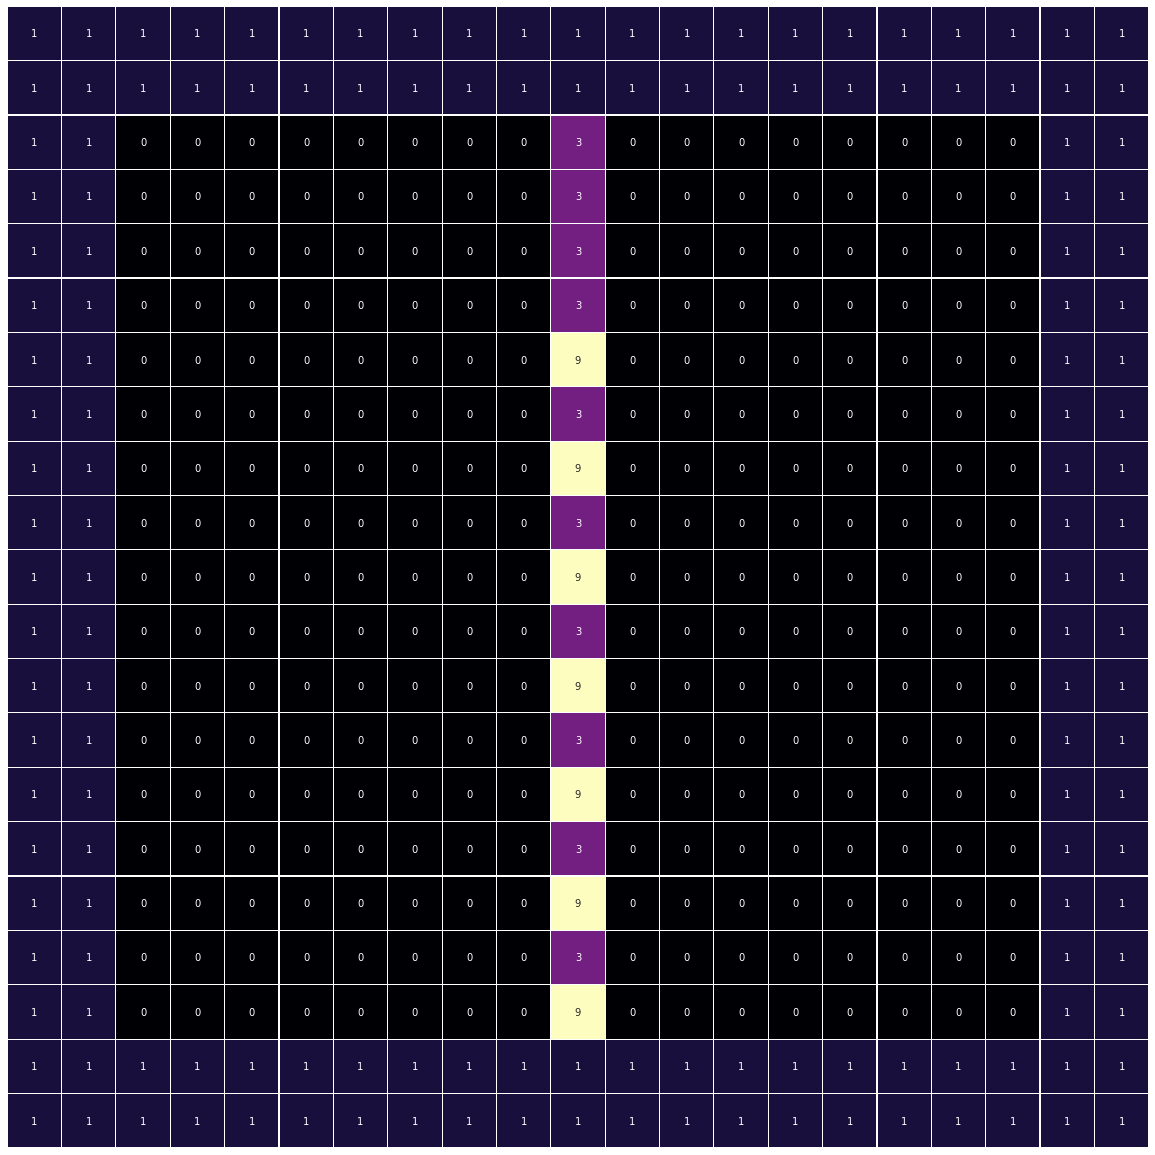

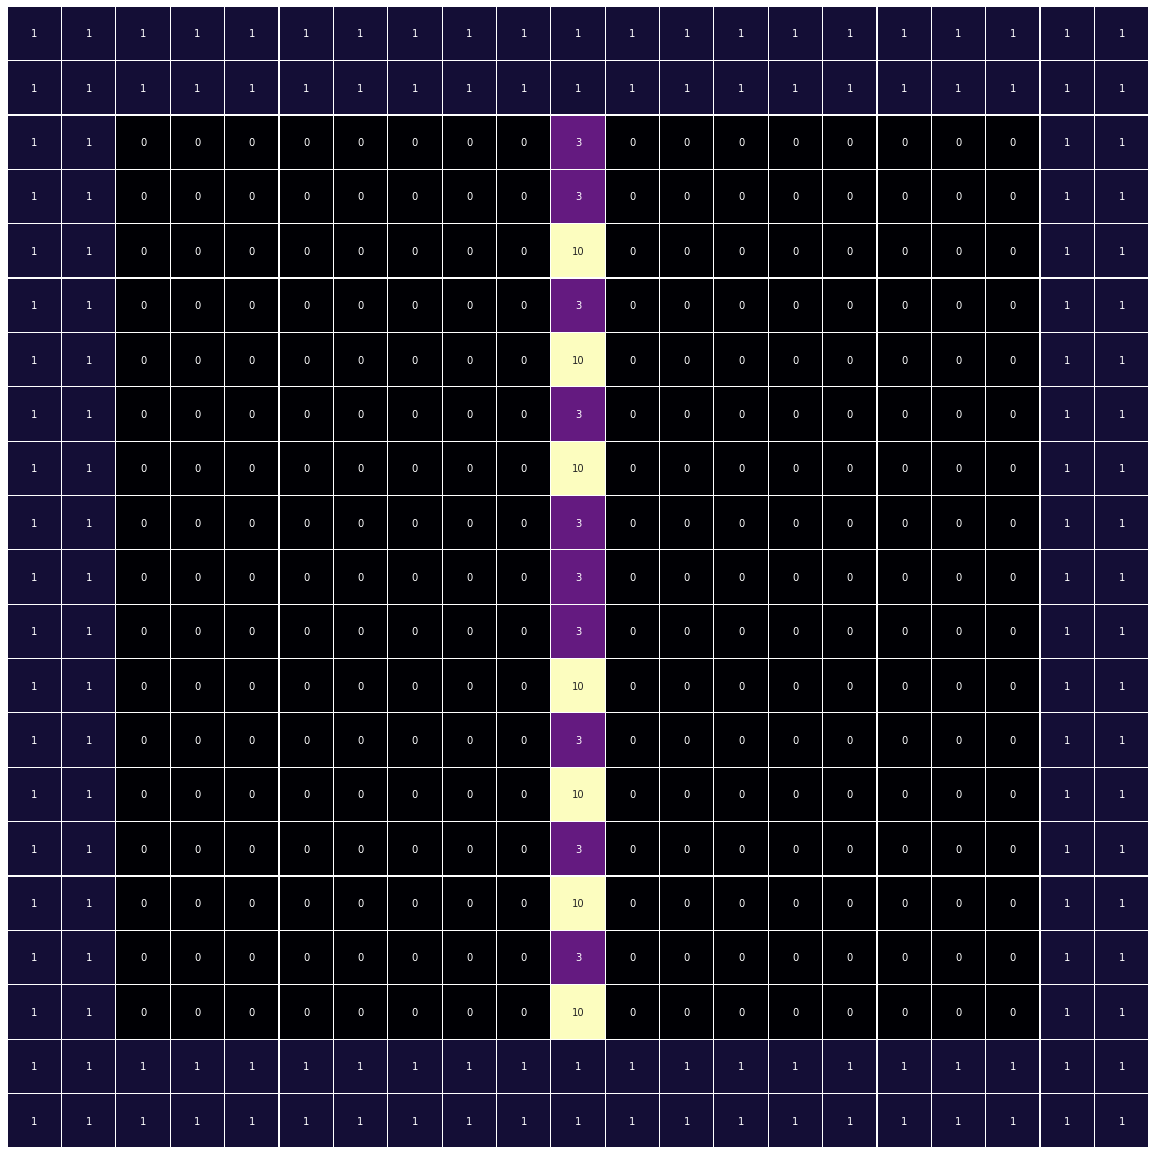

In [10]:
tablero = generarMatriz((9*2)+3)
px = ((2*9)+3)-3
py = ((2*9)+3)//2
listaTiempos.append(mesure_time(inicio, px, py, px, py, tablero))




##Prueba 2: matriz 25x25 vacia

movimiento de peon 9.  [48, 26]
movimiento de peon 10.  [48, 26]
movimiento de peon 9.  [46, 26]
movimiento de peon 10.  [46, 26]
movimiento de peon 9.  [44, 26]
movimiento de peon 10.  [44, 26]
movimiento de peon 9.  [42, 26]
movimiento de peon 10.  [42, 26]
movimiento de peon 9.  [40, 26]
movimiento de peon 10.  [40, 26]
movimiento de peon 9.  [38, 26]
movimiento de peon 10.  [38, 26]
movimiento de peon 9.  [36, 26]
movimiento de peon 10.  [36, 26]
movimiento de peon 9.  [34, 26]
movimiento de peon 10.  [34, 26]
movimiento de peon 9.  [32, 26]
movimiento de peon 10.  [32, 26]
movimiento de peon 9.  [30, 26]
movimiento de peon 10.  [30, 26]
movimiento de peon 9.  [28, 26]
movimiento de peon 10.  [28, 26]
movimiento de peon 9.  [26, 26]
movimiento de peon 10.  [24, 26]
movimiento de peon 9.  [24, 26]
movimiento de peon 10.  [22, 26]
movimiento de peon 9.  [22, 26]
movimiento de peon 10.  [20, 26]
movimiento de peon 9.  [20, 26]
movimiento de peon 10.  [18, 26]
movimiento de peon 9.  [1

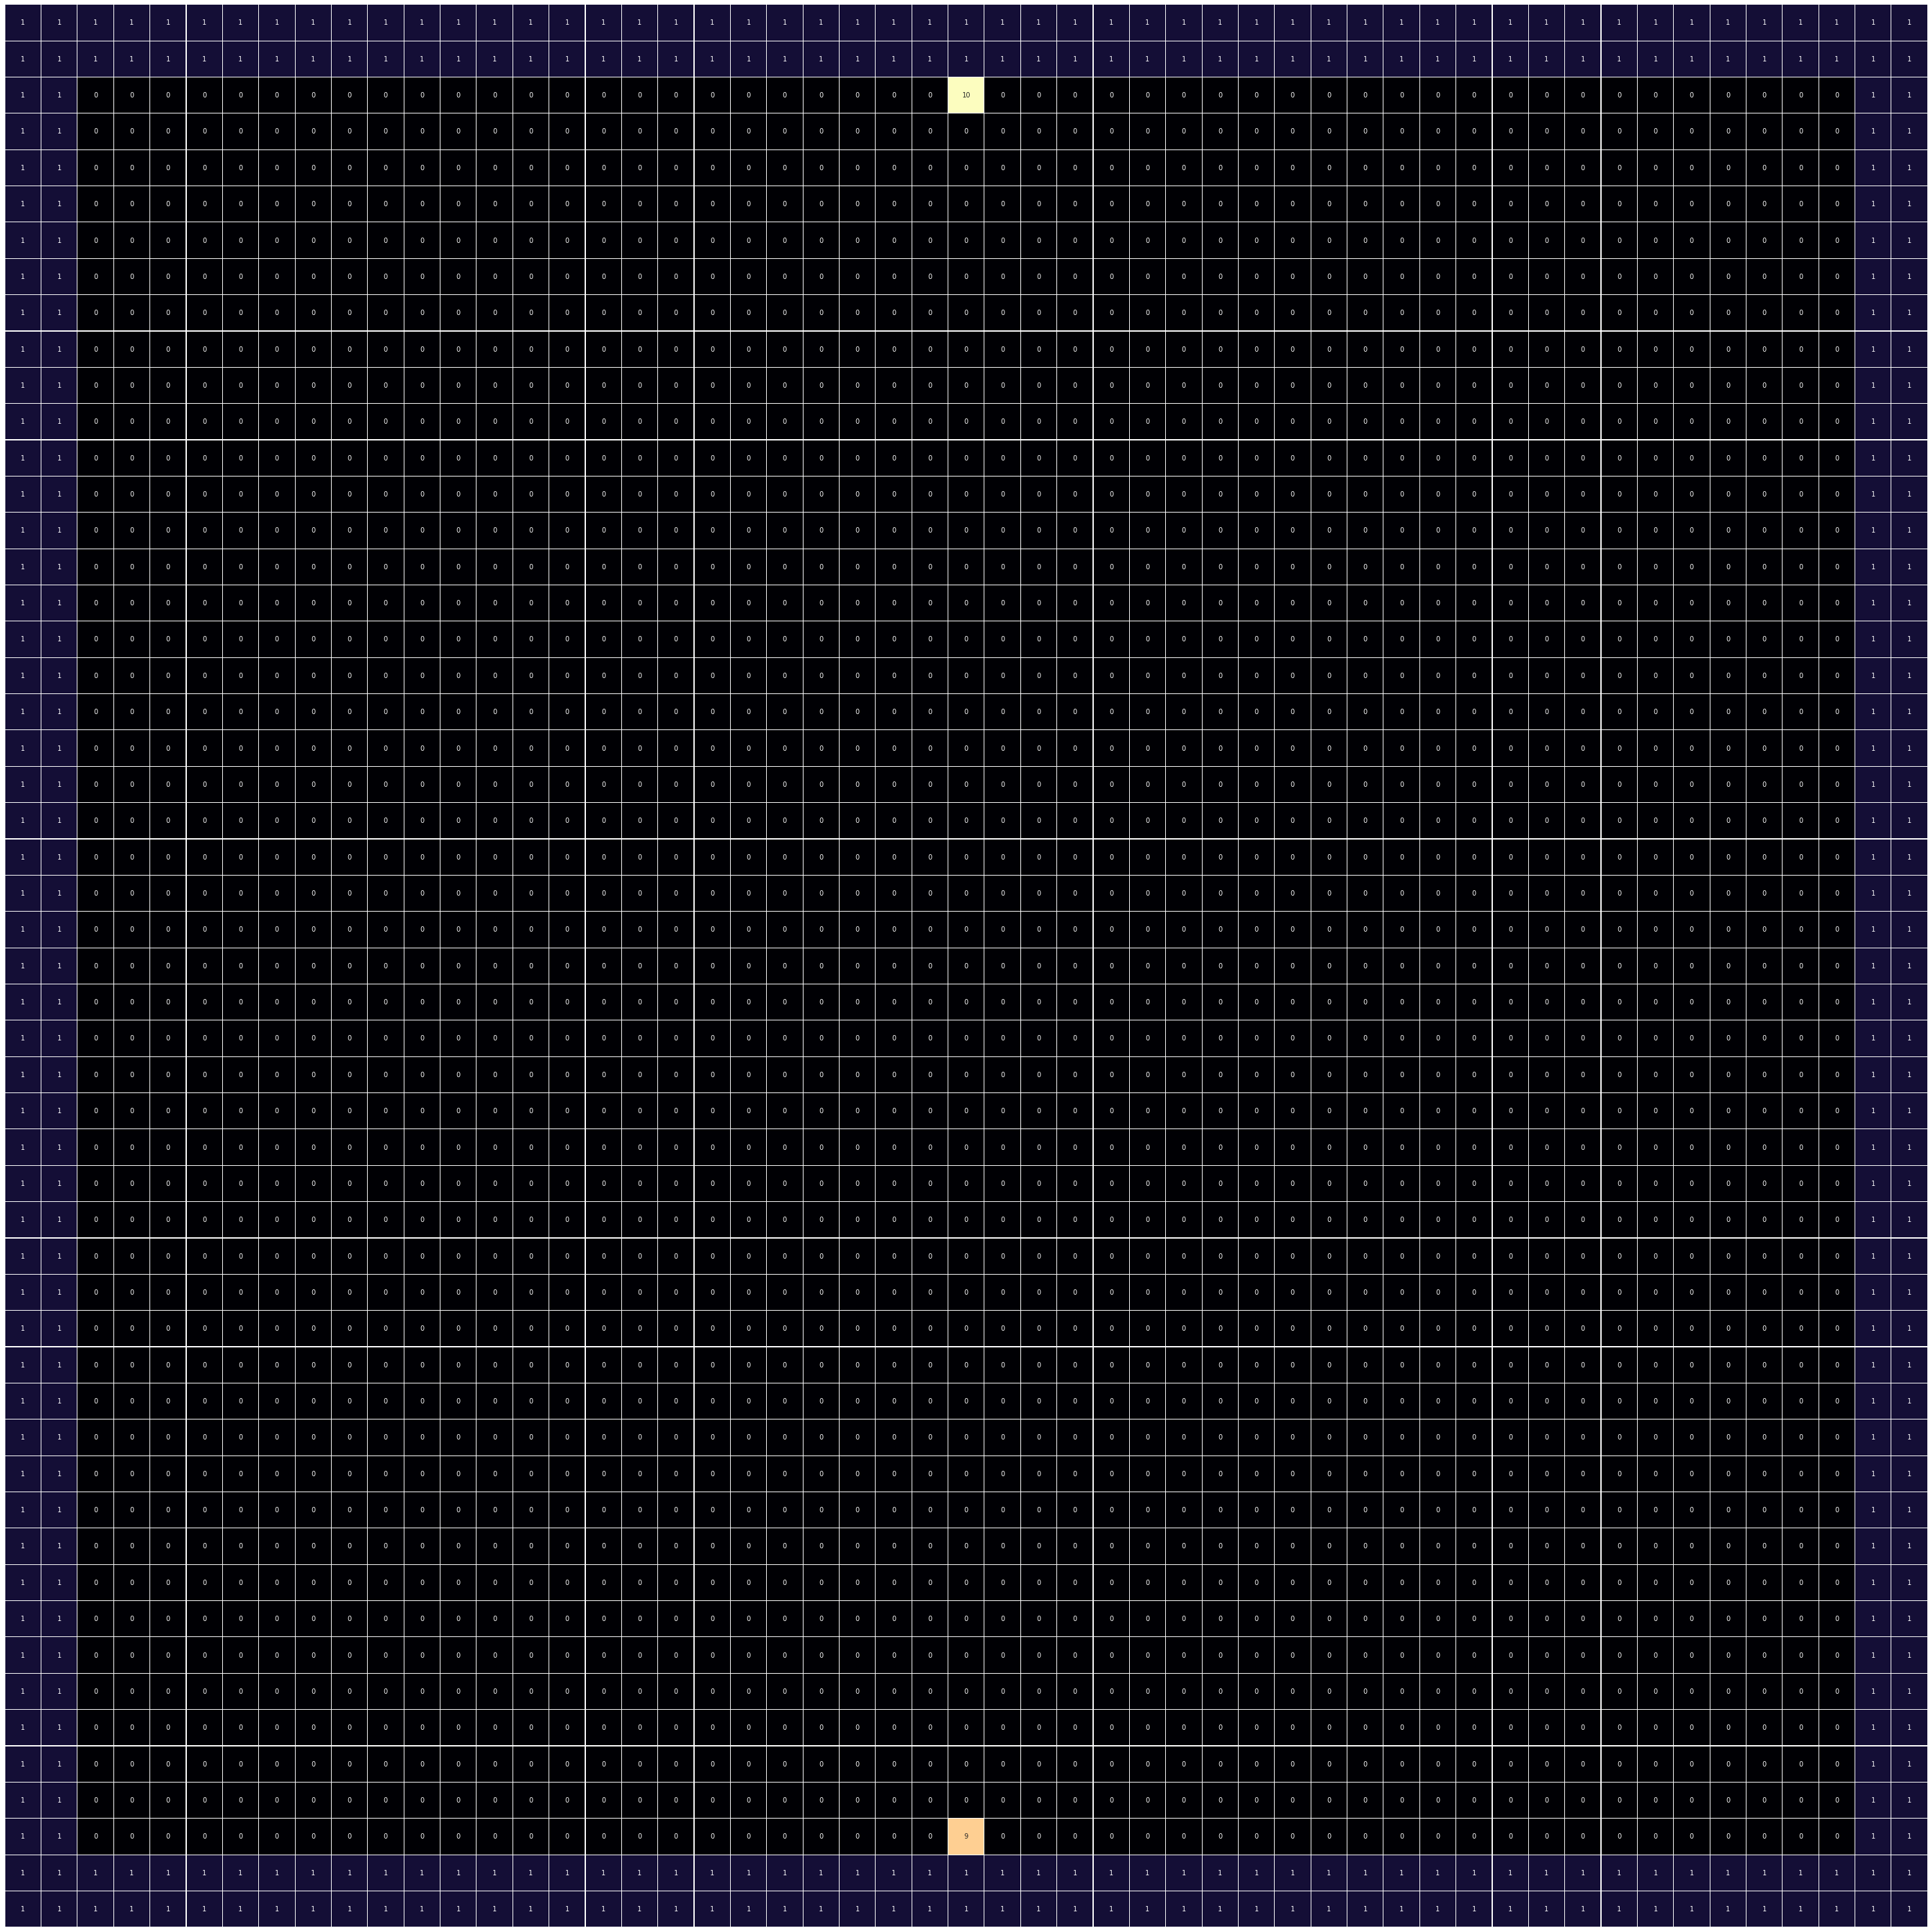

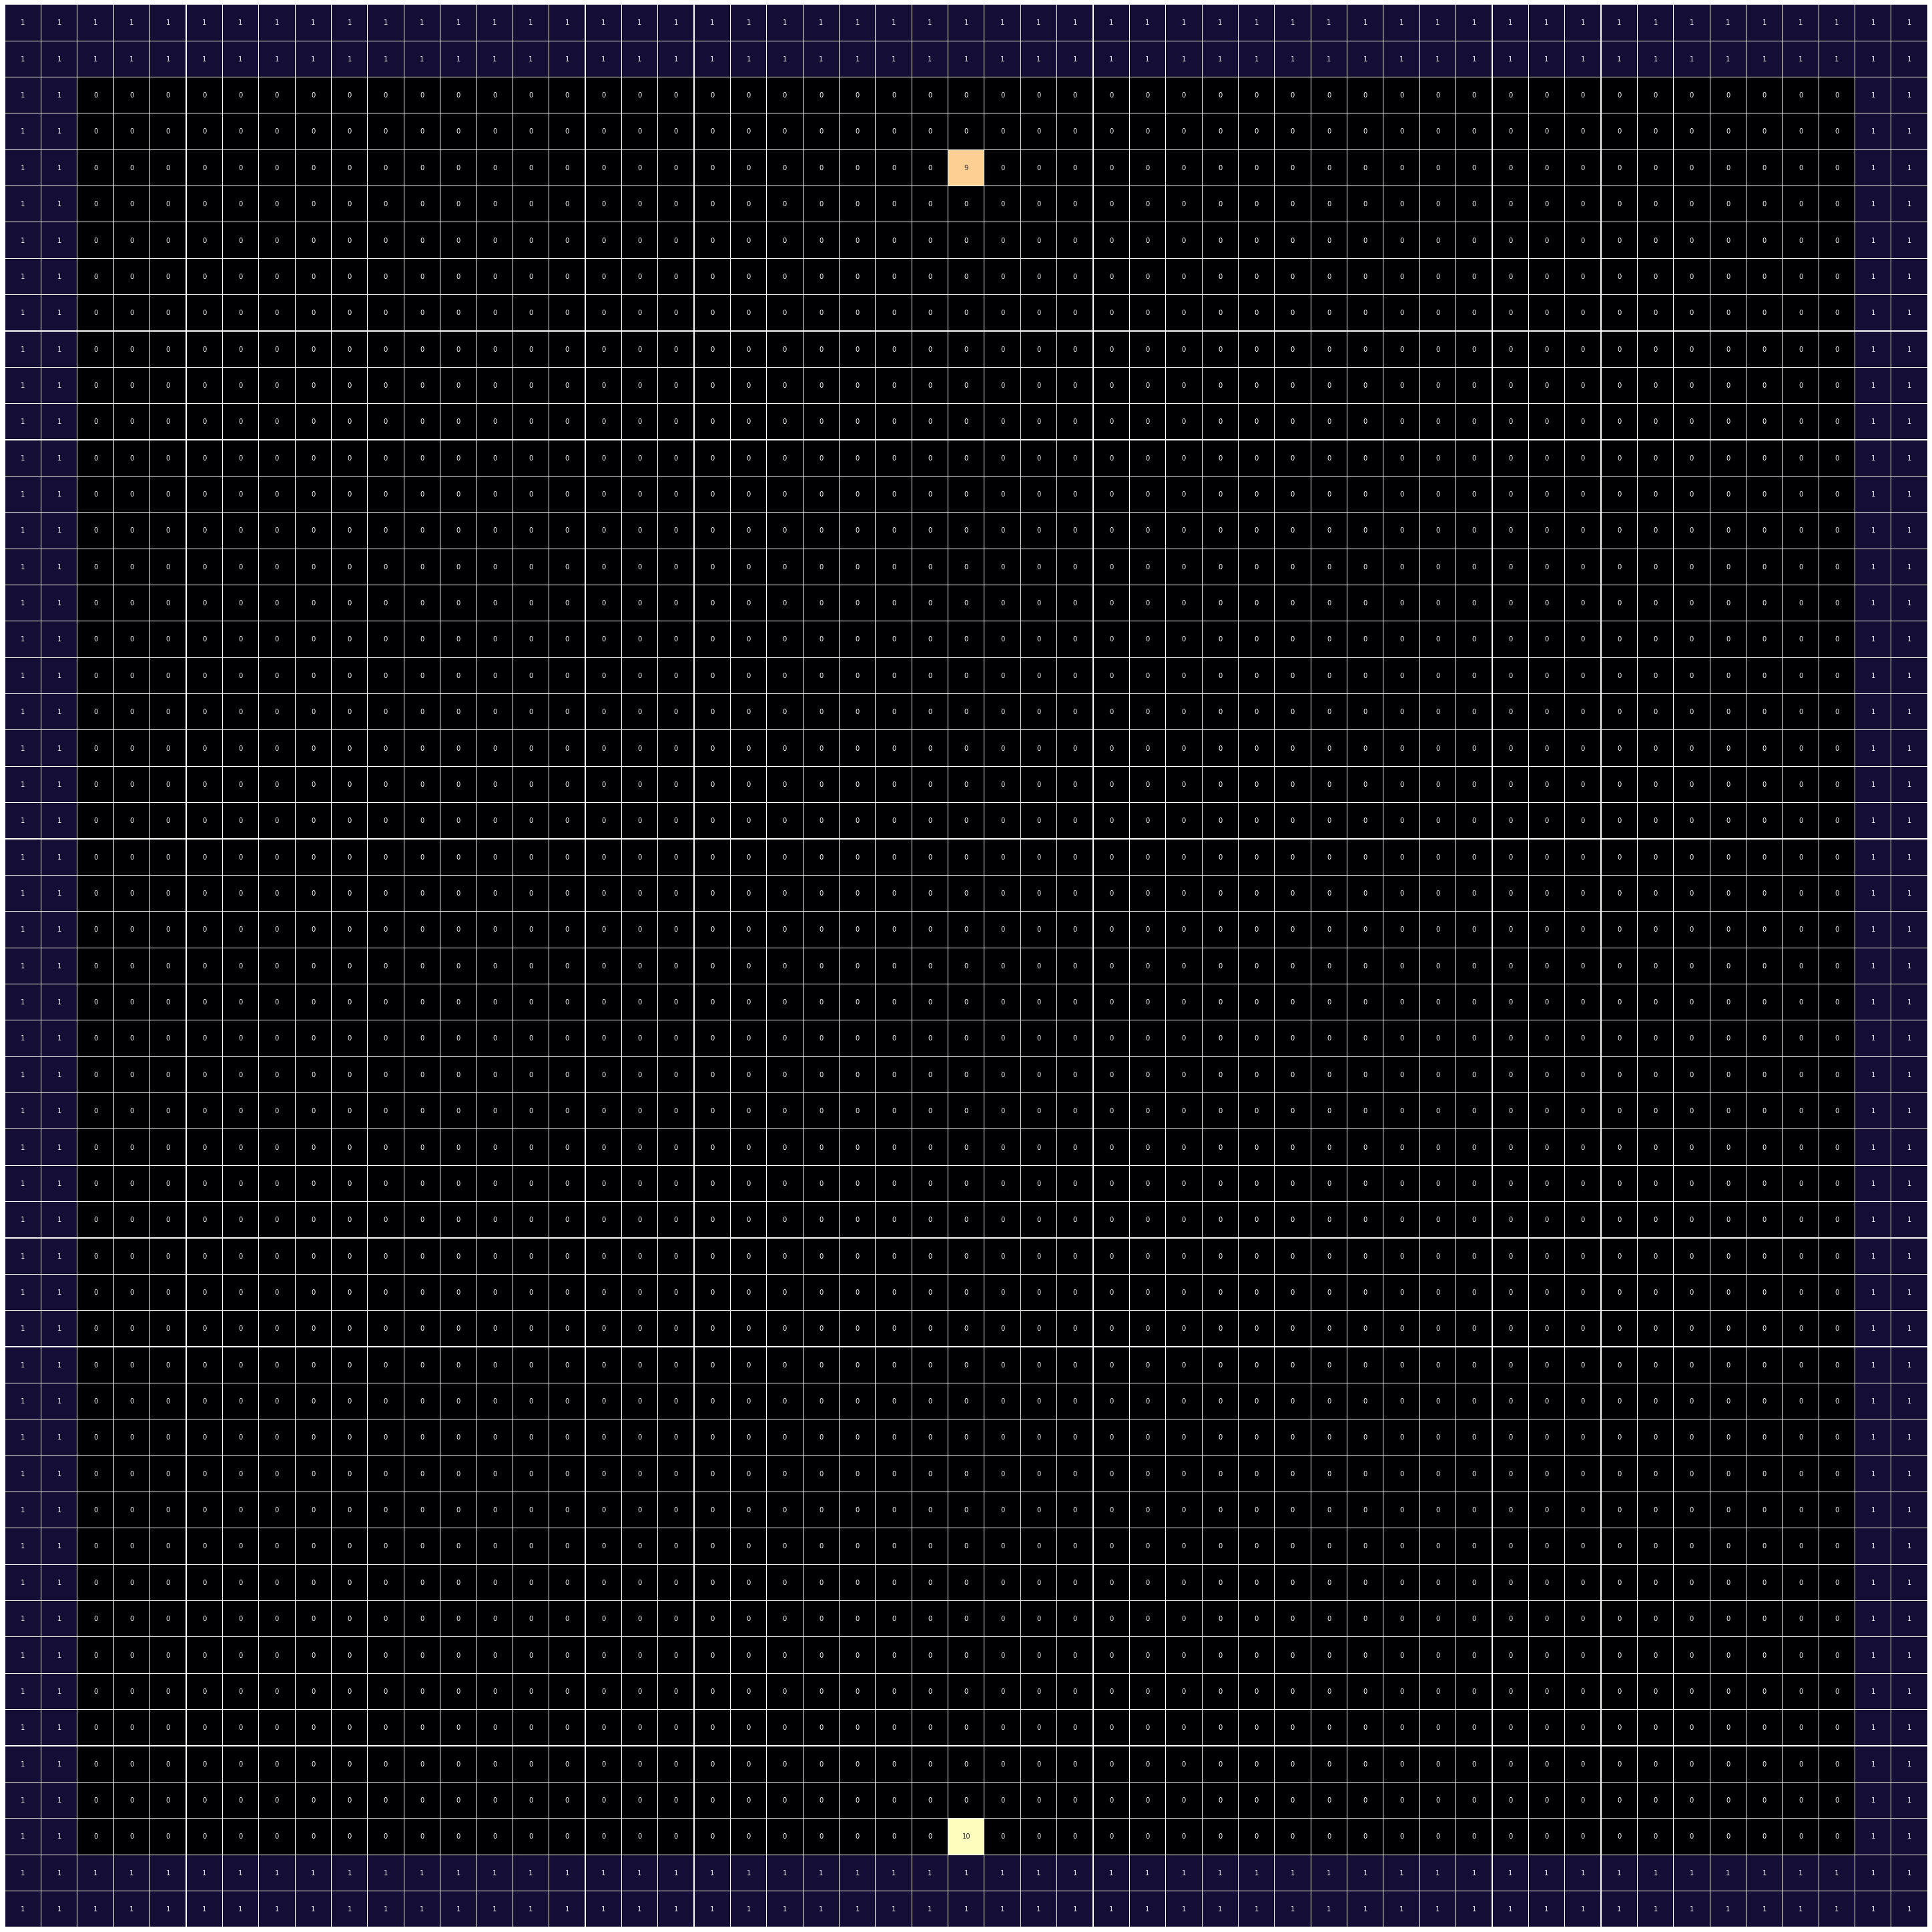

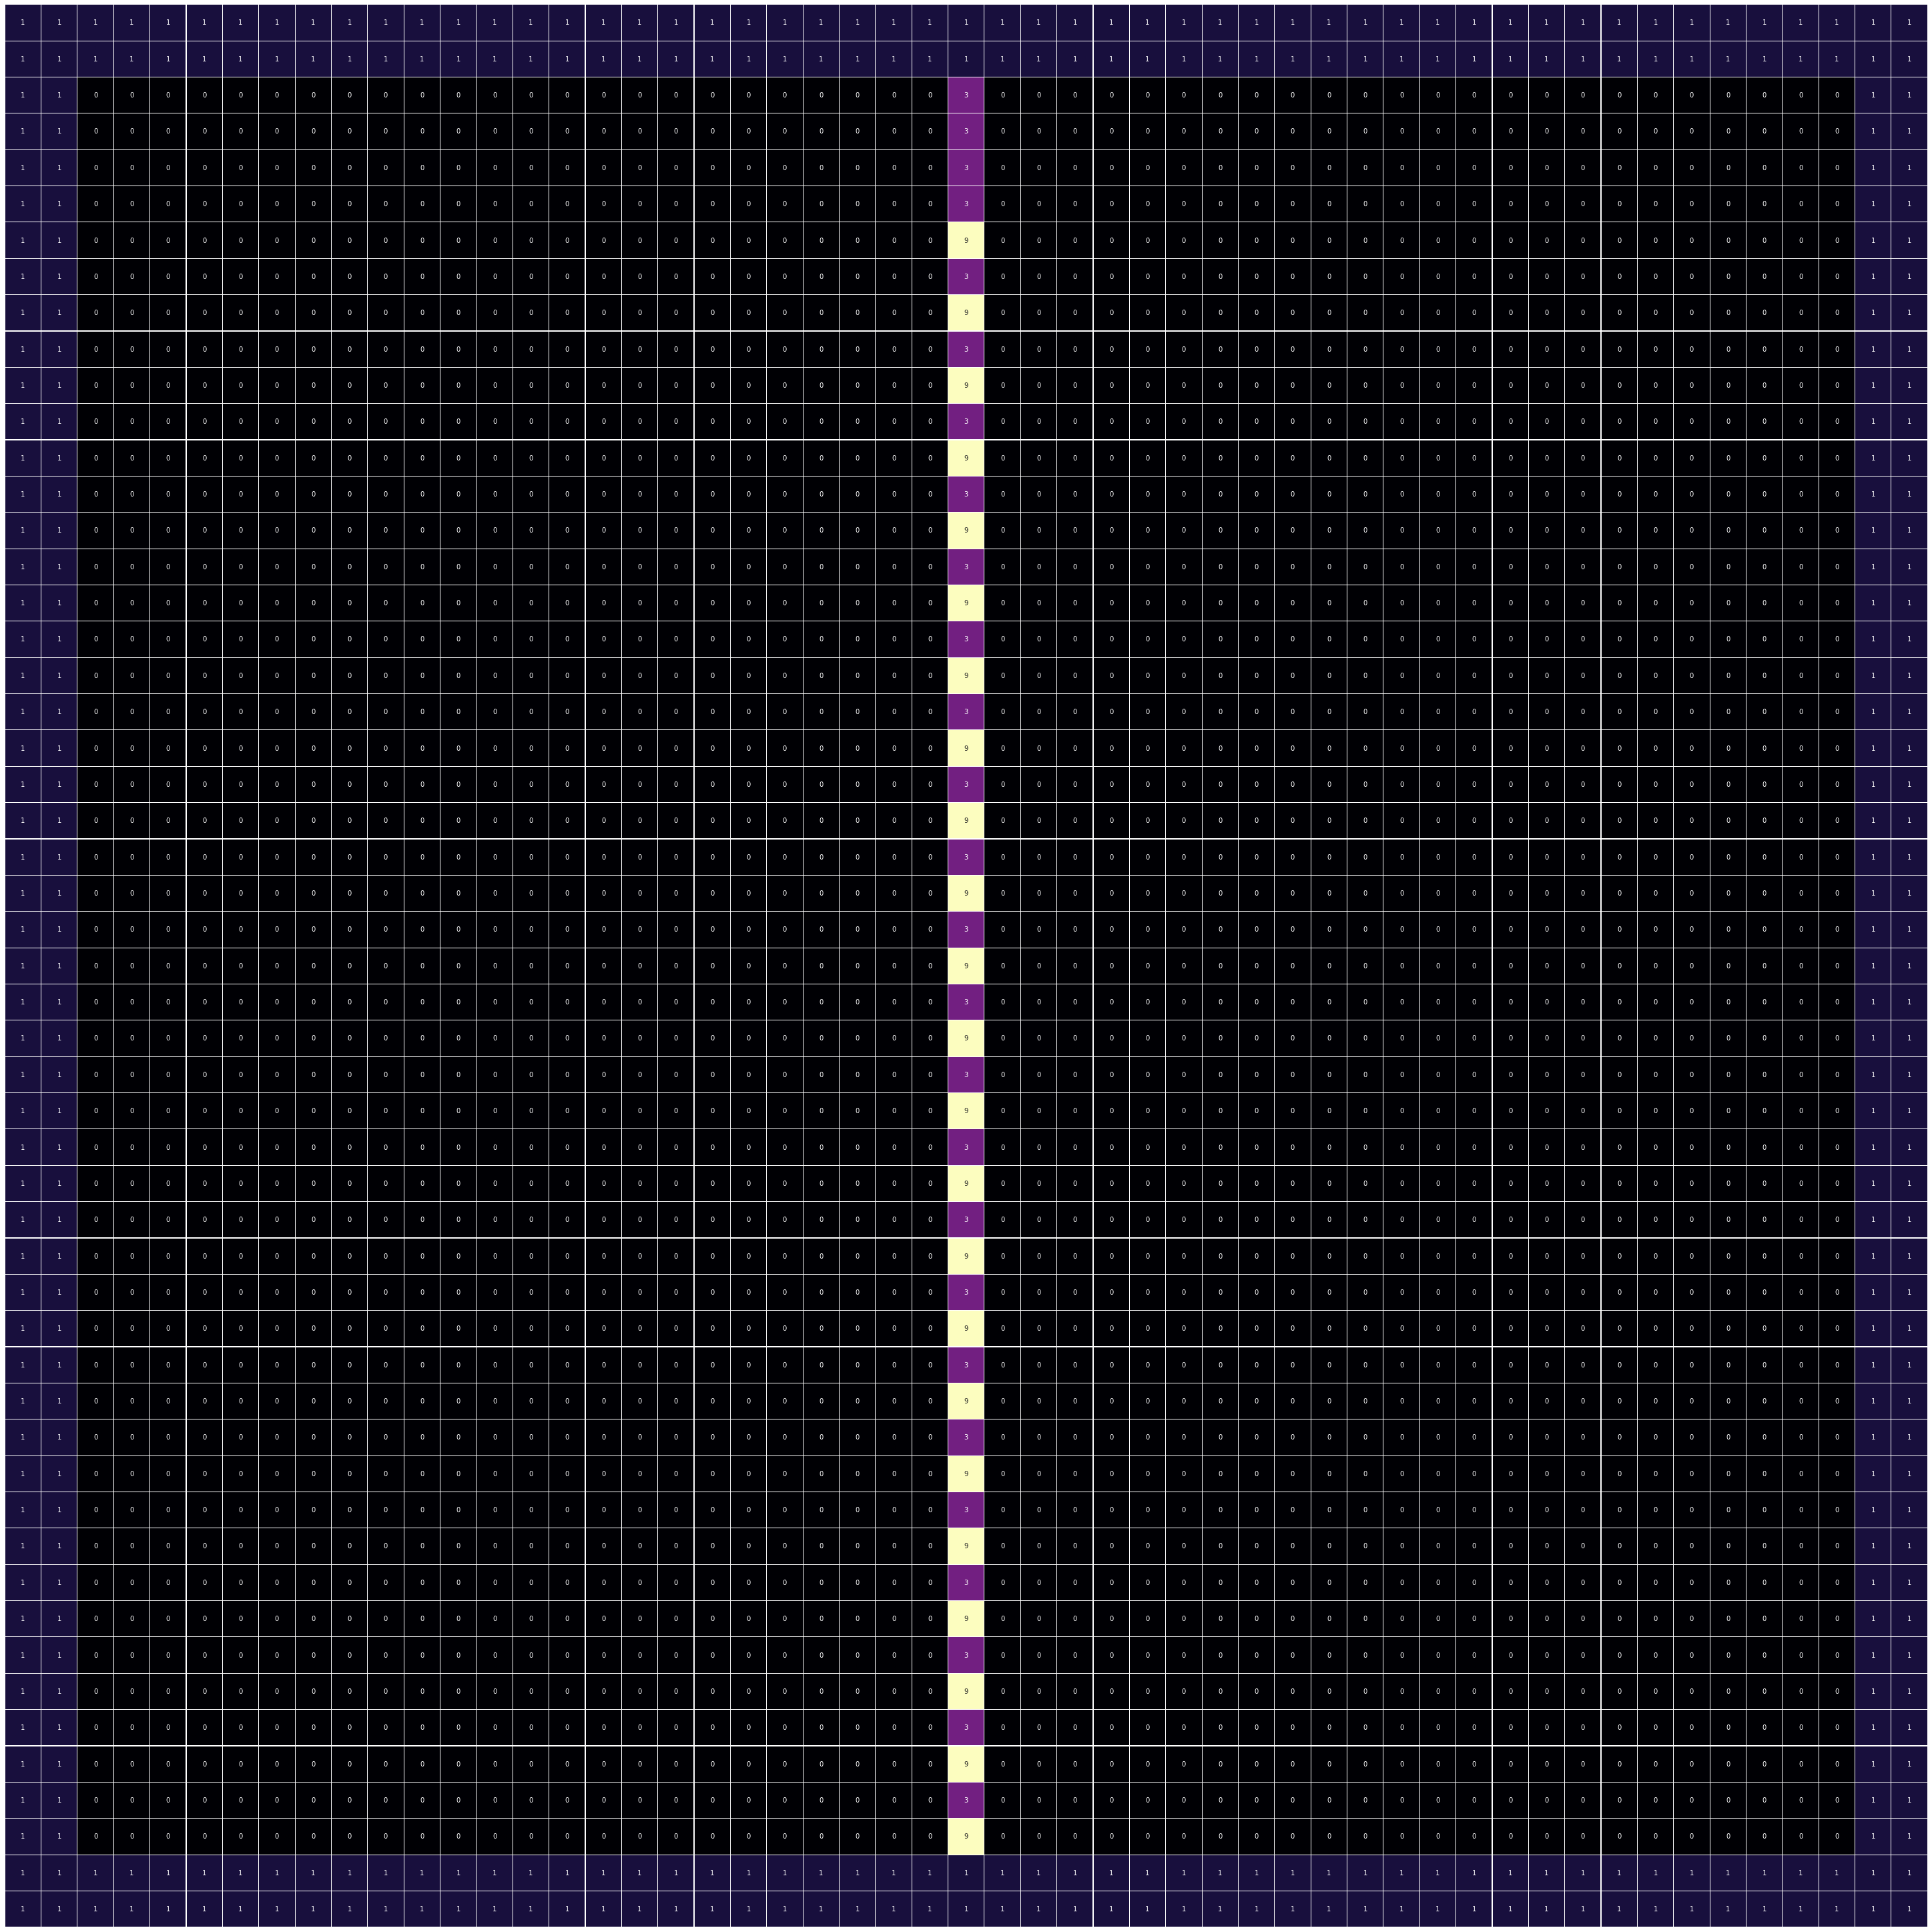

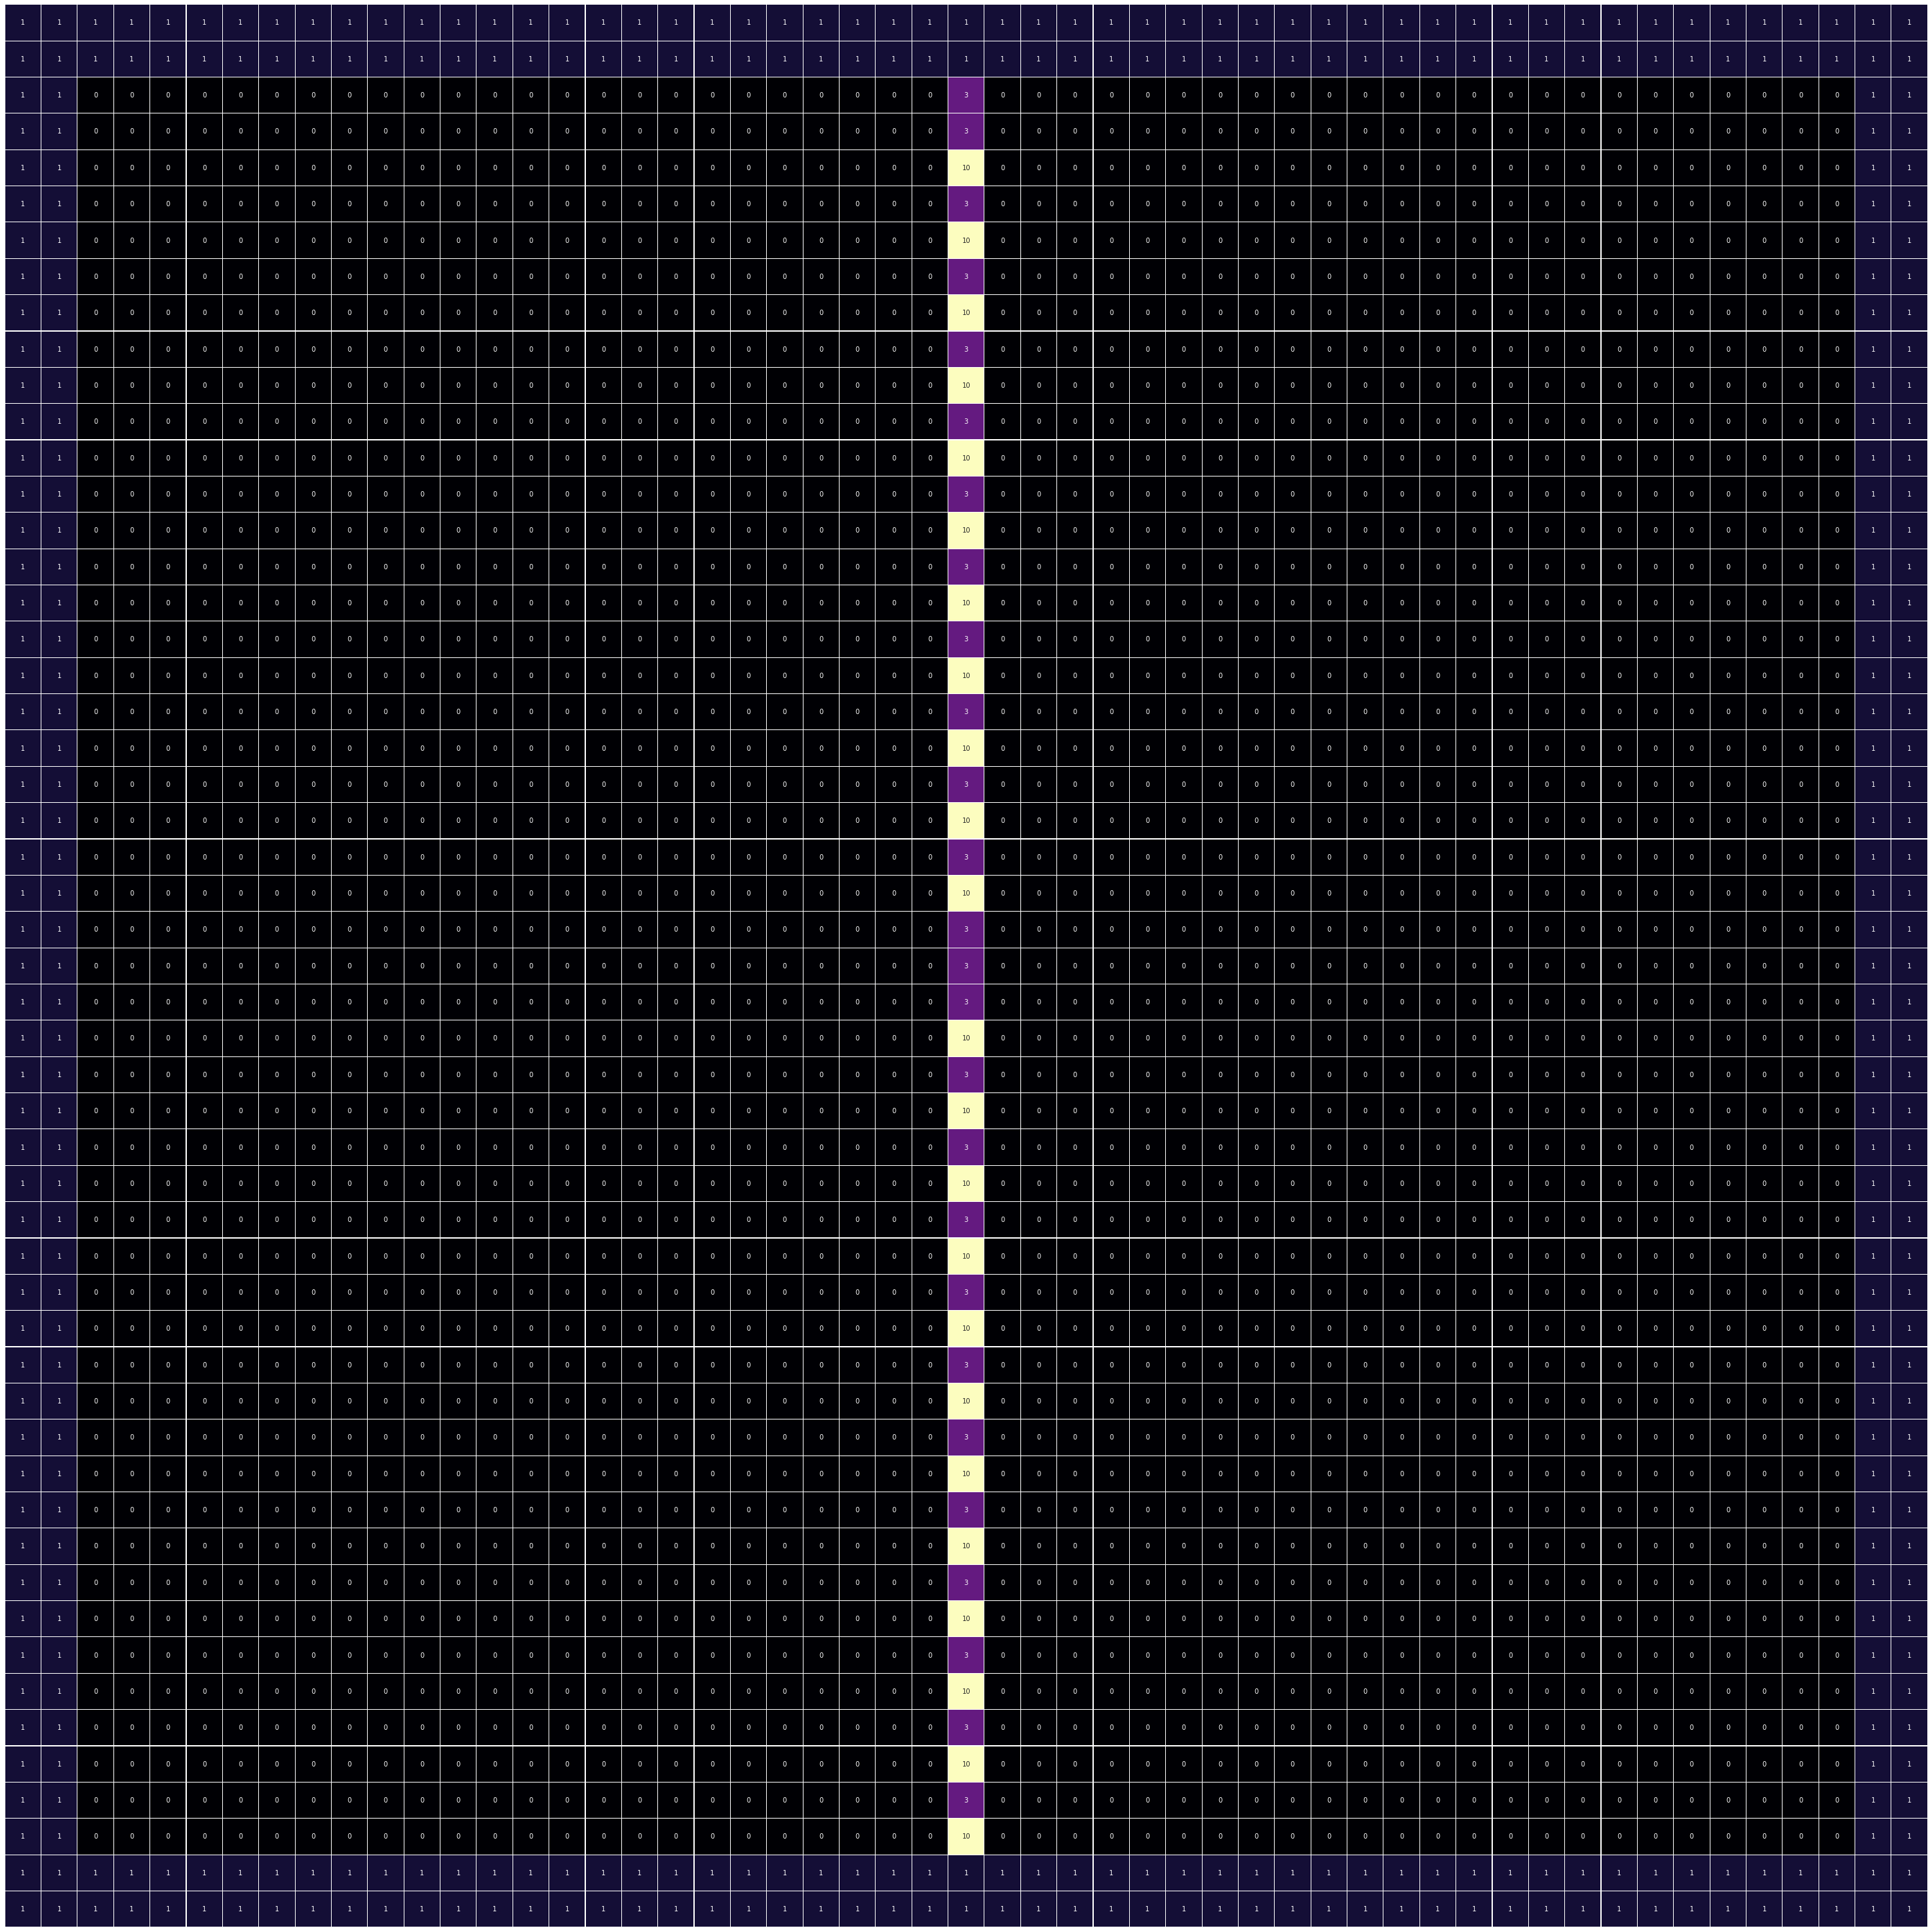

In [11]:
tablero = generarMatriz((25*2)+3)
px = ((2*25)+3)-3
py = ((2*25)+3)//2
listaTiempos.append(mesure_time(inicio, px, py, px, py, tablero))


##Prueba 3: matriz 9x9 Laberinto

movimiento de peon 9.  [16, 2]
movimiento de peon 10.  [18, 4]
movimiento de peon 9.  [14, 2]
movimiento de peon 10.  [18, 6]
movimiento de peon 9.  [12, 2]
movimiento de peon 10.  [18, 8]
movimiento de peon 9.  [12, 4]
movimiento de peon 10.  [16, 8]
movimiento de peon 9.  [12, 6]
movimiento de peon 10.  [14, 8]
movimiento de peon 9.  [12, 8]
movimiento de peon 10.  [12, 8]
movimiento de peon 9.  [12, 10]
movimiento de peon 10.  [10, 8]
movimiento de peon 9.  [12, 12]
movimiento de peon 10.  [6, 8]
movimiento de peon 9.  [10, 12]
movimiento de peon 10.  [4, 8]
movimiento de peon 9.  [8, 12]
movimiento de peon 10.  [2, 8]


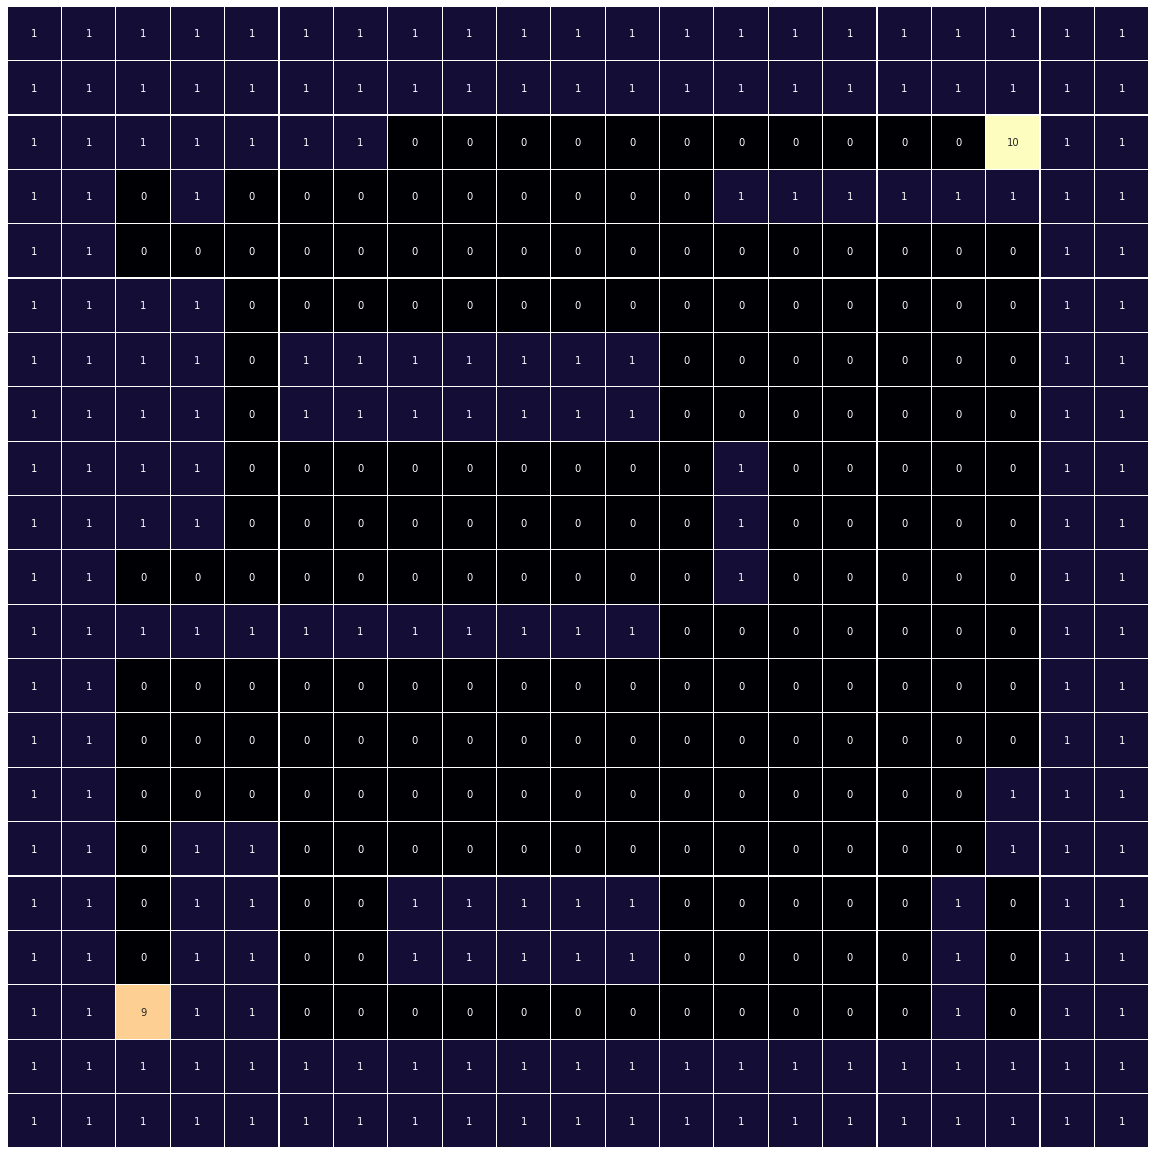

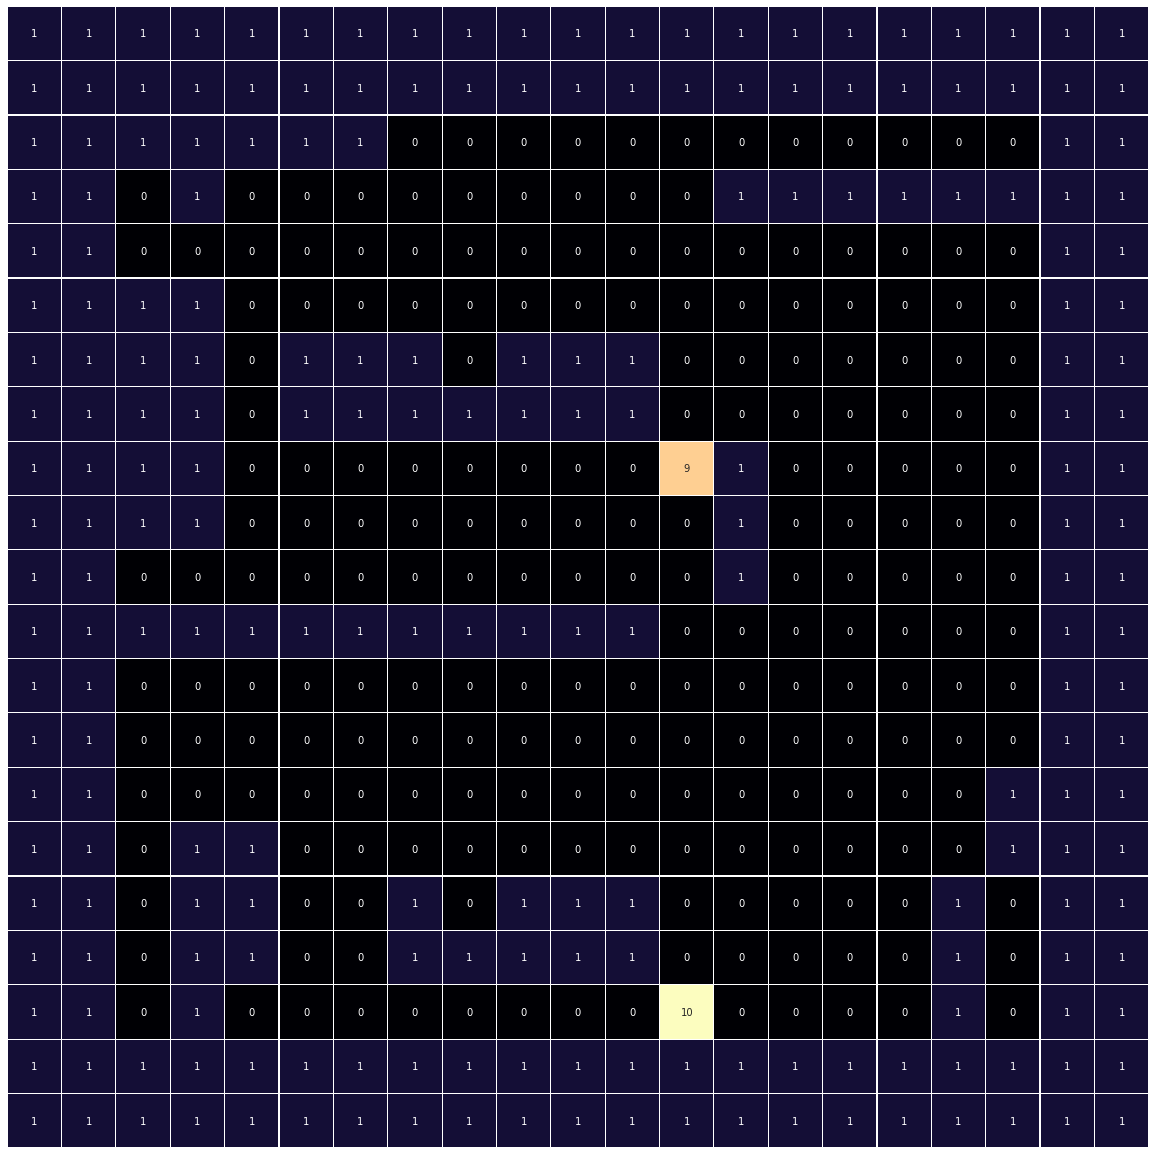

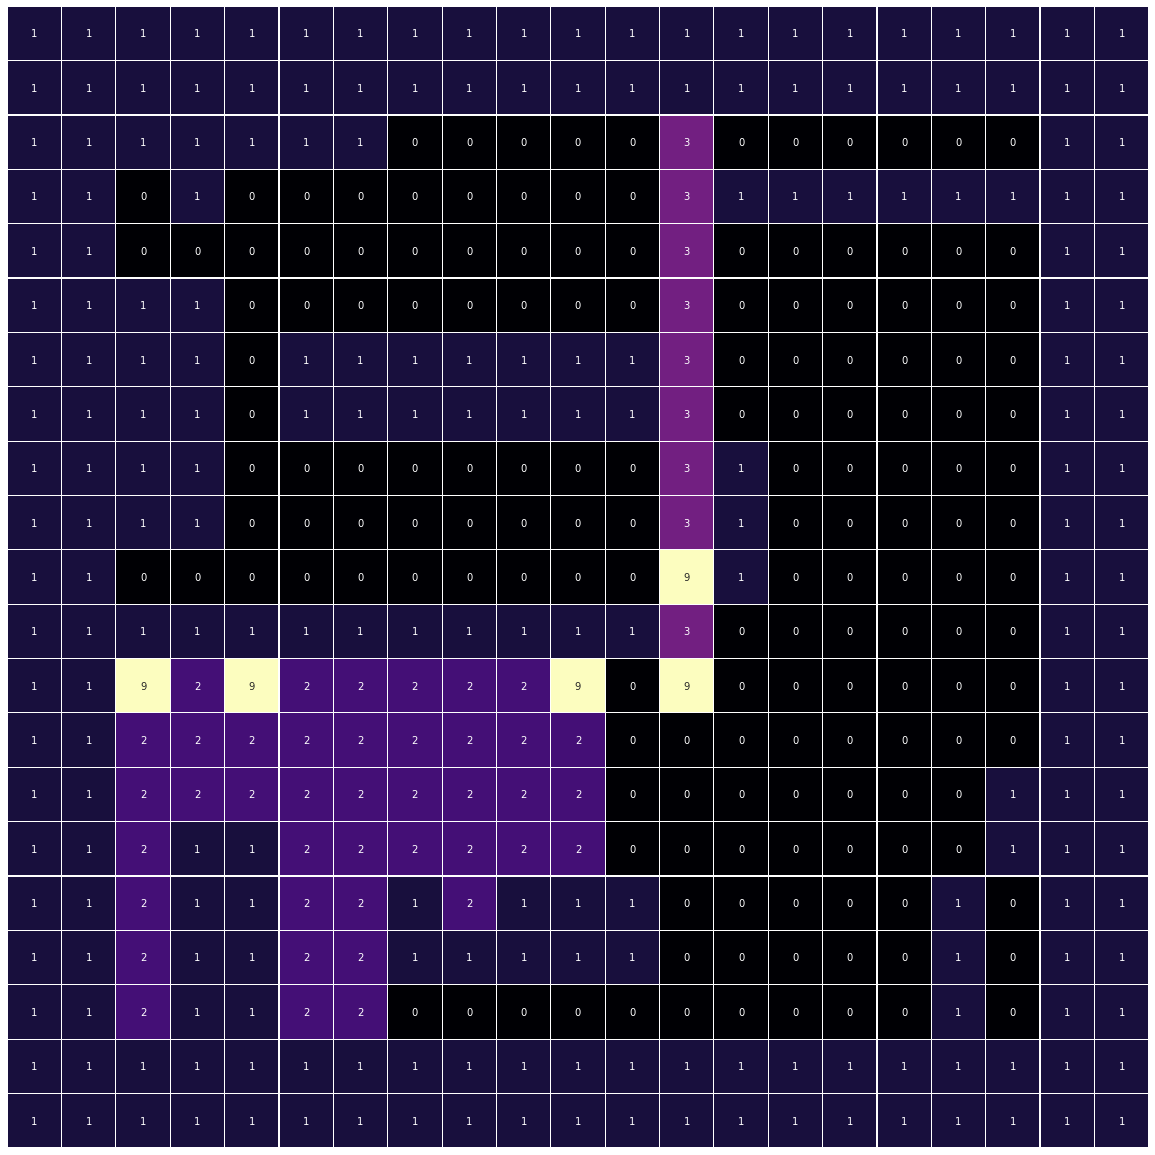

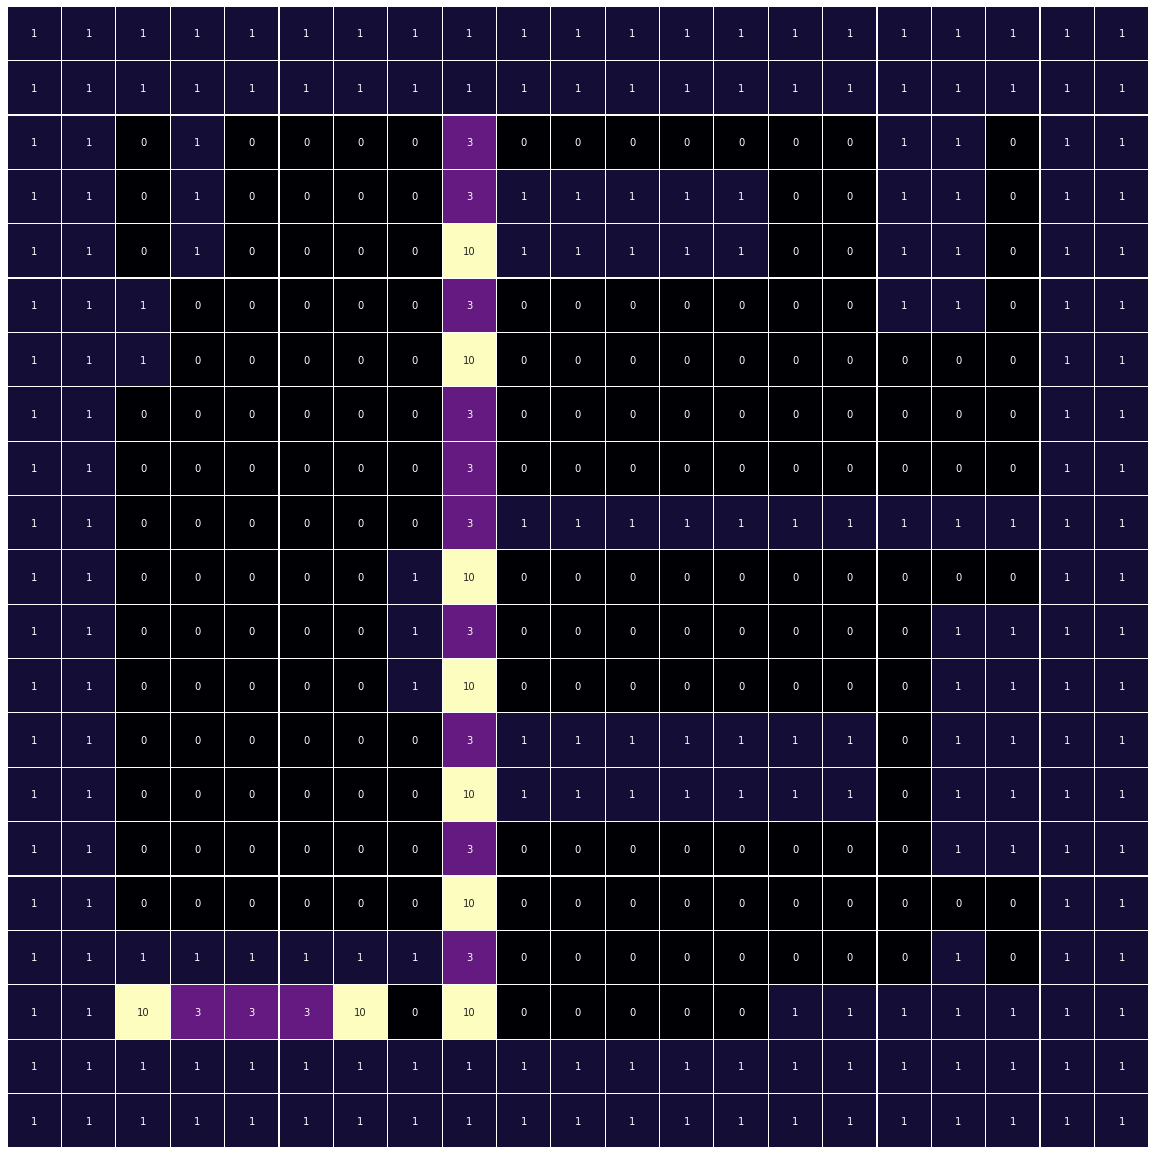

In [12]:
tablero = generarLaberinto((9*2)+3)
px = 18
py = 2
listaTiempos.append(mesure_time(inicio, px, py, px, py, tablero))


##Prueba 4: matriz 101x101 vacia

In [13]:
tablero = generarMatriz((101*2)+3)
px = ((2*101)+3)-3
py = ((2*101)+3)//2
listaTiempos.append(mesure_time(inicio, px, py, px, py, tablero))


movimiento de peon 9.  [200, 102]
movimiento de peon 10.  [200, 102]
movimiento de peon 9.  [198, 102]
movimiento de peon 10.  [198, 102]
movimiento de peon 9.  [196, 102]
movimiento de peon 10.  [196, 102]
movimiento de peon 9.  [194, 102]
movimiento de peon 10.  [194, 102]
movimiento de peon 9.  [192, 102]
movimiento de peon 10.  [192, 102]
movimiento de peon 9.  [190, 102]
movimiento de peon 10.  [190, 102]
movimiento de peon 9.  [188, 102]
movimiento de peon 10.  [188, 102]
movimiento de peon 9.  [186, 102]
movimiento de peon 10.  [186, 102]
movimiento de peon 9.  [184, 102]
movimiento de peon 10.  [184, 102]
movimiento de peon 9.  [182, 102]
movimiento de peon 10.  [182, 102]
movimiento de peon 9.  [180, 102]
movimiento de peon 10.  [180, 102]
movimiento de peon 9.  [178, 102]
movimiento de peon 10.  [178, 102]
movimiento de peon 9.  [176, 102]
movimiento de peon 10.  [176, 102]
movimiento de peon 9.  [174, 102]
movimiento de peon 10.  [174, 102]
movimiento de peon 9.  [172, 102]


#Resultados
Aqui se visualizan los tiempoes que demoro el algoritmo en cada respectiva prueba

In [14]:
print("El tiempo del tablero vacio 9x9 es: ", listaTiempos[0])
print("El tiempo del tablero vacio 25x25 es: ", listaTiempos[1])
print("El tiempo del tablero con laberinto 9x9 es: ", listaTiempos[2])
print("El tiempo del tablero vacio 100x100 es: ", listaTiempos[3])

El tiempo del tablero vacio 9x9 es:  1.007256269454956
El tiempo del tablero vacio 25x25 es:  6.209439516067505
El tiempo del tablero con laberinto 9x9 es:  1.5563478469848633
El tiempo del tablero vacio 100x100 es:  115.17871046066284
